In [113]:
# Importing Libraries

import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [114]:
# Geting data as Pandas Data Frame
# Make sure tcc_ceds_music.csv is in the same folder as this script

df = pd.read_csv('tcc_ceds_music.csv')


In [115]:
# Tokenizing each of the songs' lyrics

df['lyrics'] = df['lyrics'].apply(nltk.word_tokenize)

In [116]:
# genres: A set of all genres present in the data
genres = set()

for genre in df['genre']:
    if genre not in genres:
        genres.add(genre)
        

In [117]:
# Getting rid of stop words from the tokenized lyrics

stopwords = stopwords.words('english')
stopwords.extend(['hi', 'go', 'know', 'cause', 'sure', 'gonna', 'wanna', 'wan', 'na', 'got', 'ta', 'gon', 'want', 
                  'come', 'let', 'say', 'yeah', 'hey', 'oh', 'ooh', 'na', 'la', 'da', 'uh', 'ah', 'huh',
                  'im', 'ive', 'youre', 'youve', 'theyre', 'theyve', 'were', 'weve', 'hes', 'shes', 'thats', 'thatll',
                  'ill', 'youll', 'theyll', 'well', 'isnt', 'arent', 'wasnt', 'werent', 'hasnt', 'havent', 'hadnt', 'didnt',
                  'till', 'time', 'think', 'need', 'like', 'life', 'feel', 'live', 'away', 'leave', 'gon', 'right', 'tell', 'lyric', 'nigga'])

# Return the list of tokenized lyrics
# If the lowercase version of the word is a stopword it is not added
def remove_stopwords(lyrics):
    return [word for word in lyrics if word.lower() not in stopwords]

df['lyrics'] = df['lyrics'].apply(lambda lyrics: remove_stopwords(lyrics))

In [118]:
# Lemmatizing the lyrics

lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each token and return a list of lemmatized tokens 
def lemmatize_words(lyrics):
    return [lemmatizer.lemmatize(word) for word in lyrics]

df['lyrics'] = df['lyrics'].apply(lambda lyrics: lemmatize_words(lyrics))

In [145]:
# Create different data frames for different genres
# pop, blues, country, reggae, rock, jazz, hip hop

# used_genres: The genres that we will create visualizations for
# all_genre_dfs: A list of dfs where each df represents one of the selected genres

used_genres = ['pop', 'rock', 'country', 'hip hop']

# Return a Pandas dataframe containing all songs where genre = the specified genre
def get_genre_df(df, genre):
    return df[df['genre'] == genre]

# Apply get_genre_df to each selected genre
def get_all_genre_dfs(df, genres):
    dfs_ls = []
    for genre in genres:
        dfs_ls.append(get_genre_df(df, genre))
    return dfs_ls

# Apply get_all_genre_dfs using the specified genres and the tokenized, lemmatized dataframe
all_genre_dfs = get_all_genre_dfs(df, used_genres)

In [120]:
# genre_count: a dictionary to keep track of the # of songs in each genre
genre_count = {}
for genre in df['genre']:
    if genre in genre_count:
        genre_count[genre] += 1
    else:
        genre_count[genre] = 0

(28372, 31)
{'pop': 7041, 'country': 5444, 'blues': 4603, 'jazz': 3844, 'reggae': 2497, 'rock': 4033, 'hip hop': 903}


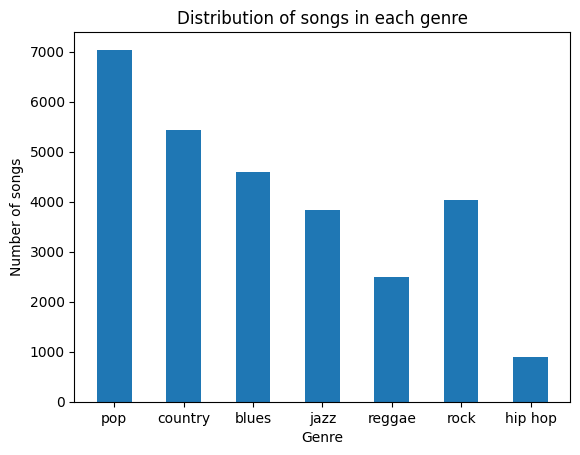

In [138]:
# Use matplotlib to create a bar graph describing the counts of songs per genre
plt.bar(genre_count.keys(), genre_count.values(), width=0.5)
plt.xlabel("Genre")
plt.ylabel("Number of songs")
plt.title("Distribution of songs in each genre")
plt.show()

In [121]:
# num_total_words: Total # of words in the dataset
# avg_words: Avg # of words per song in the dataset

num_total_words = 0

# For every song in the dataframe add its length to the total
for song in df['lyrics']:
    num_total_words += len(song)

# Divide the total number of words by the total number of songs
avg_words = num_total_words/28372

60.876603693782606


In [96]:
# Creating different data frames for different time periods
# year_step: the size of each time period we will create visualizations for 
    # ex: If 10, create visualizations for every 10 years from 1950 to present

# Return a df containing all songs released between start_year and end_year
def get_time_period_df(df, start_year, end_year):
    return df[(df['release_date'] >= start_year) & (df['release_date'] <= end_year)]

# Apply get_time_period_df to all time periods determined by year_step
# Add the dfs to a list
def get_all_time_dfs(df, year_step):
    dfs_ls = []
    for i in range(min(df['release_date']), max(df['release_date']), year_step):
        dfs_ls.append(get_time_period_df(df, i, i + year_step - 1))
    return dfs_ls

year_step = 20
all_time_dfs = get_all_time_dfs(df, year_step)


(4877, 31)
(8626, 31)
(9238, 31)
(5631, 31)


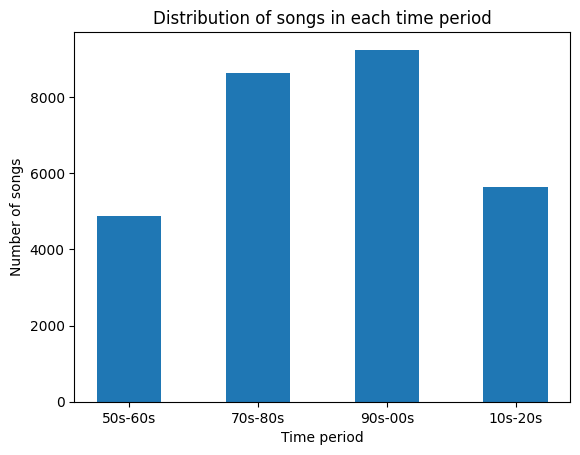

In [144]:
# Use the shape of each frame to create a matplotlib bar graph with the # of songs per period
for frame in all_time_dfs:
    print(frame.shape)

plt.bar(['50s-60s', '70s-80s', '90s-00s', '10s-20s'], [4877, 8626, 9238, 5631], width=0.5)
plt.xlabel("Time period")
plt.ylabel("Number of songs")
plt.title("Distribution of songs in each time period")
plt.show()



In [97]:
# For each time-stepped df add a random sample of n songs to samples
samples = []
for dataframe in all_time_dfs:
    samples.append(dataframe.sample(n=100, random_state=42))


In [98]:
# Add the string text of each sample to a samples_as_strings
samples_as_strings = []
for sample in samples:
    data = sample['lyrics']

    def conjoin(x):
        return ', '.join(x)
    
    samples_as_strings.append(data.apply(conjoin).values)

In [99]:
# Doing TF-IDF by time period

# This doesn't work but this is all the code we used for the example in class

from sklearn.feature_extraction.text import TfidfVectorizer
import altair as alt
import numpy as np

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_vector = tfidf_vectorizer.fit_transform(data)


    # This converts the results to a pandas dataframe, which makes it easier to
    # process and visualize
    tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    tfidf_df.stack().reset_index()
    tfidf_df = tfidf_df.stack().reset_index()
    tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
    tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

    # This line of code just saves the above output to a variable so that you can query it.

    top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

    # adding a little randomness to break ties in term ranking
    top_tfidf_plusRand = top_tfidf.copy()
    top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

    return top_tfidf_plusRand




In [100]:
# Add the tfidf of each sample to sample_tfidfs
sample_tfidfs = []
for sample in samples_as_strings:
    sample_tfidfs.append(tfidf(sample))

In [156]:
# Heat map for the 50s-60s

# base for all visualizations, with rank calculation
base = alt.Chart(sample_tfidfs[0][400:500]).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)

In [158]:
# Heat map for the 70s-80s

# base for all visualizations, with rank calculation
base = alt.Chart(sample_tfidfs[1][100:200]).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)

In [159]:
# Heat map for the 90s-00s

# base for all visualizations, with rank calculation
base = alt.Chart(sample_tfidfs[2][0:100]).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)

In [160]:
# Heat map for the 10s-20s

# base for all visualizations, with rank calculation
base = alt.Chart(sample_tfidfs[3][0:100]).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)

TIME PERIODS


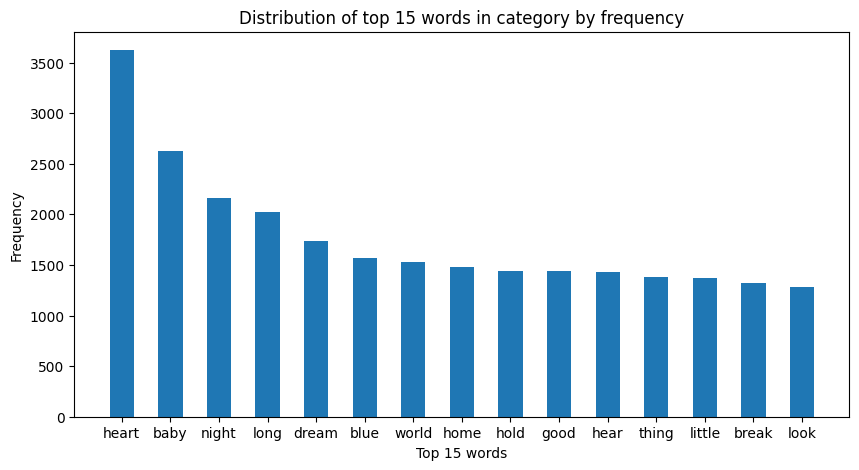

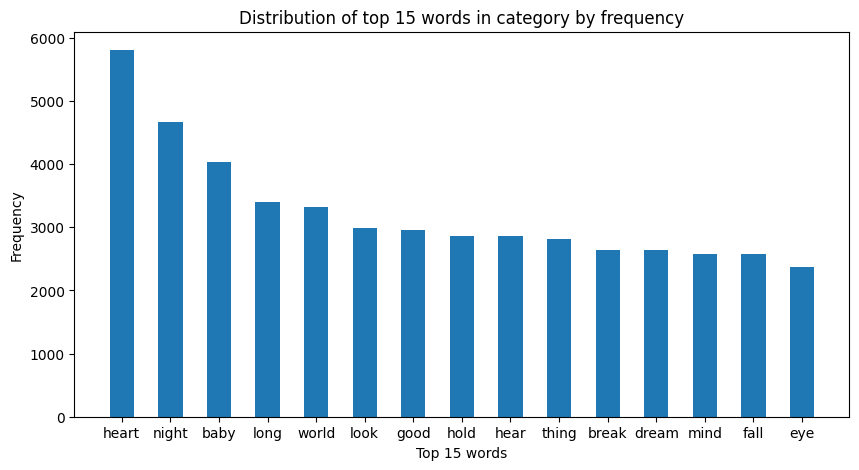

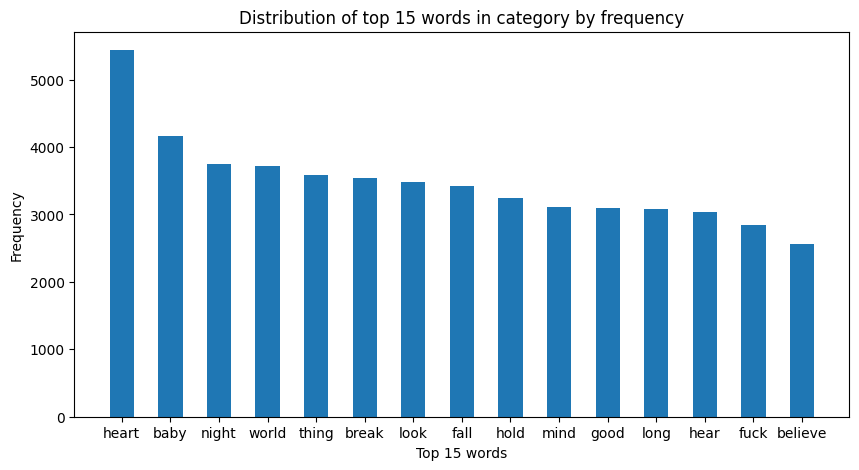

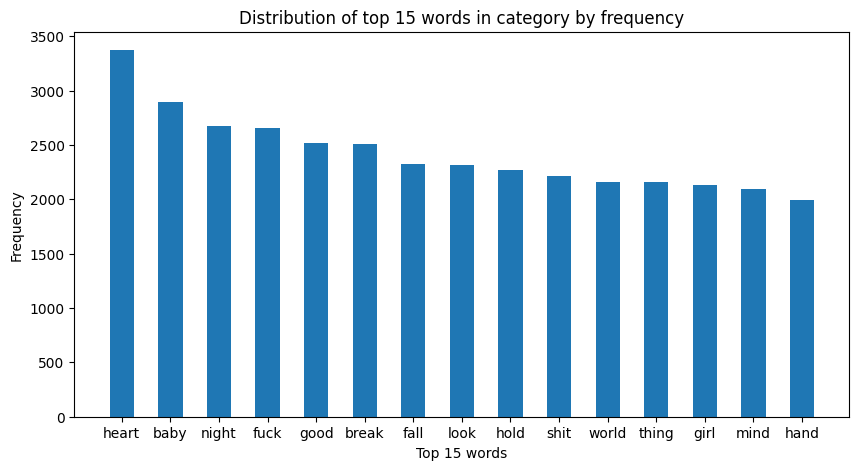

GENRES


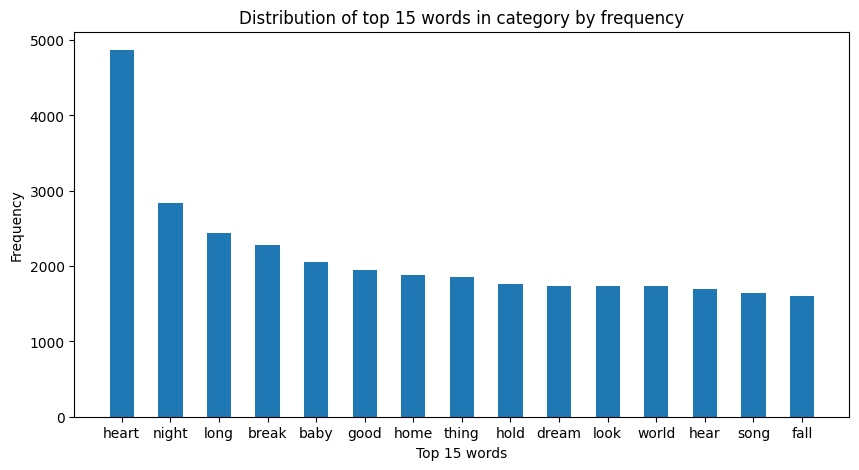

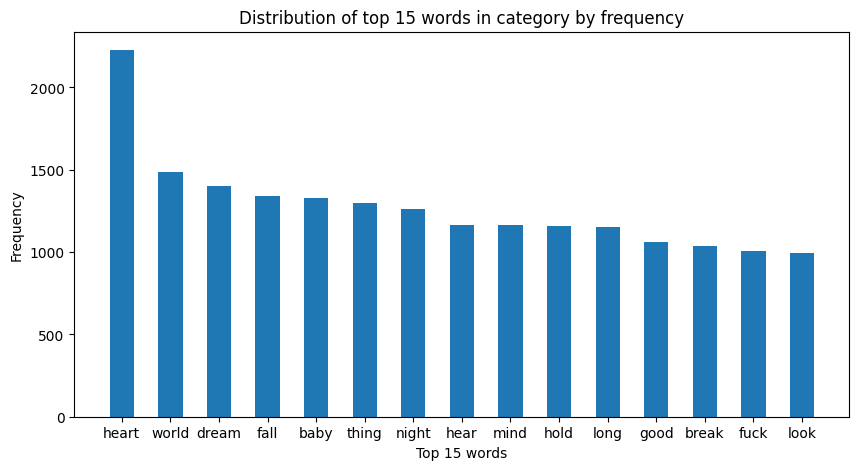

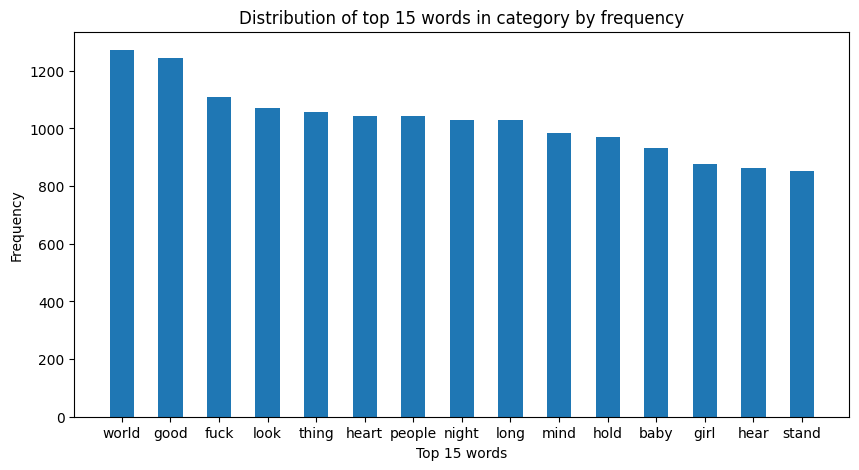

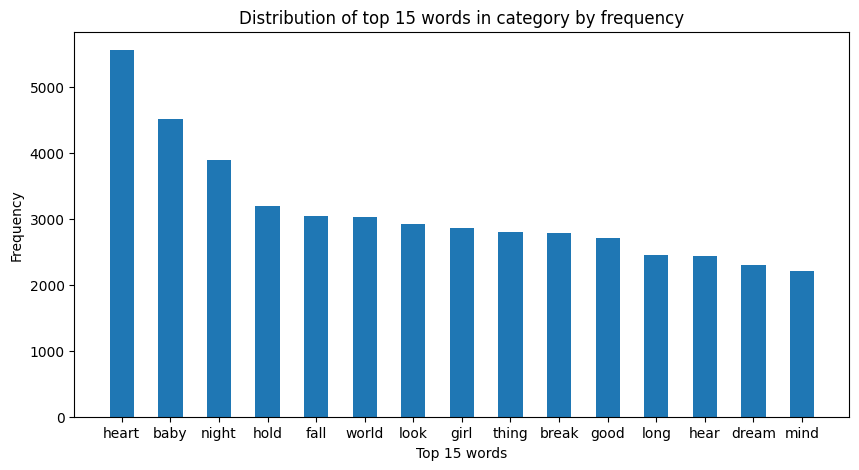

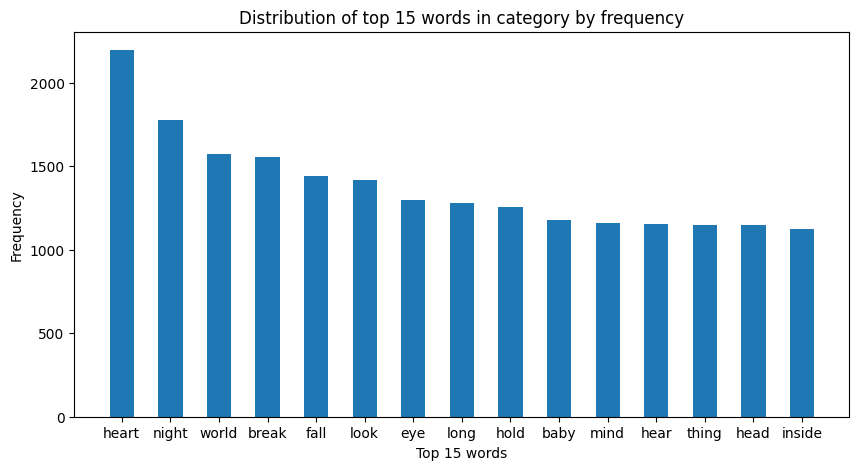

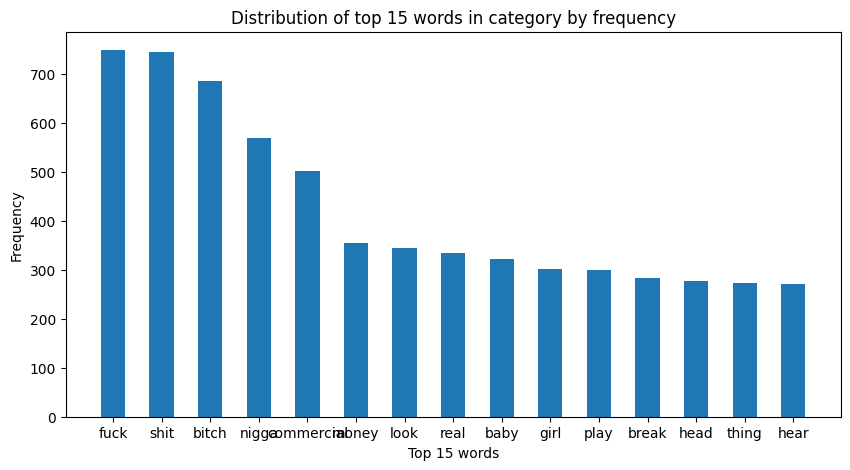

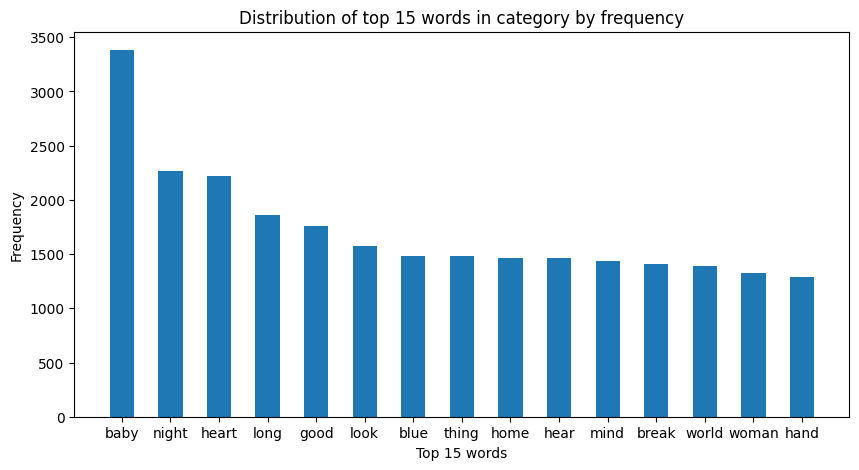

In [107]:
# Creating frequency distributions by time period and genre

def create_freqdist(df):
    lyrics = []

    # get all lyrics from category into one list
    for song in df['lyrics']:
        for lyric in song:
            lyrics.append(lyric)
    
    # get most common 15 words and turn them into a pandas dict series
    fdist = nltk.FreqDist(lyrics).most_common(15)
    fdist = pd.Series(dict(fdist))

    fig = plt.figure(figsize = (10, 5))

    # plot the bar chart
    plt.bar(fdist.index, fdist.values, width=0.5)
    plt.xlabel("Top 15 words")
    plt.ylabel("Frequency")
    plt.title("Distribution of top 15 words in category by frequency")
    plt.show()

print("TIME PERIODS")
# time period
for df in all_time_dfs:
    create_freqdist(df)

print("GENRES")
# genre
for df in all_genre_dfs:
    create_freqdist(df)

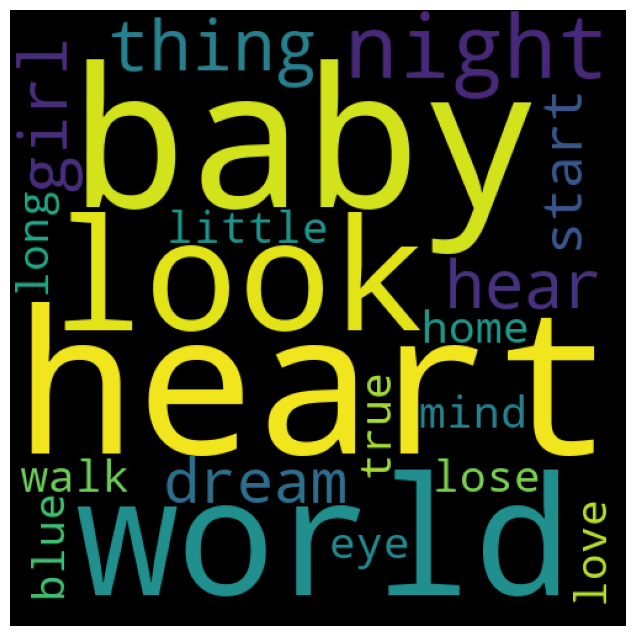

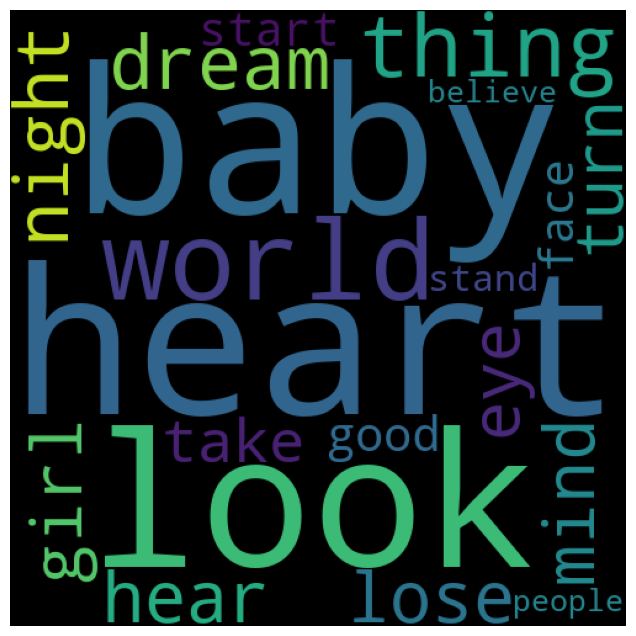

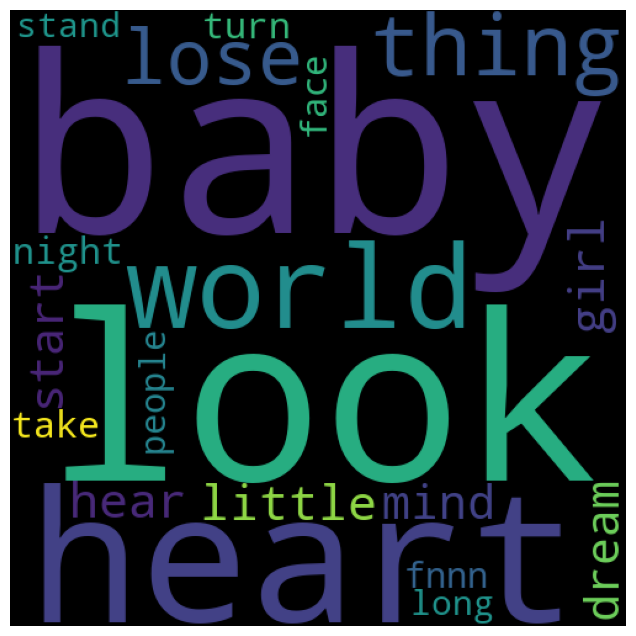

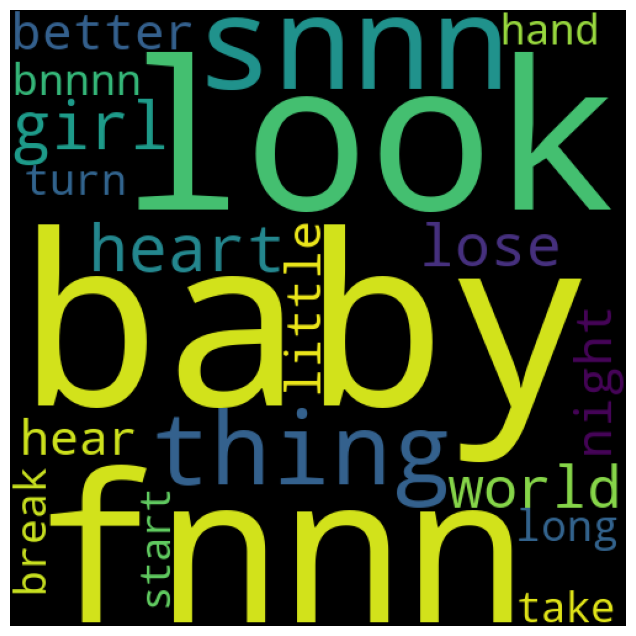

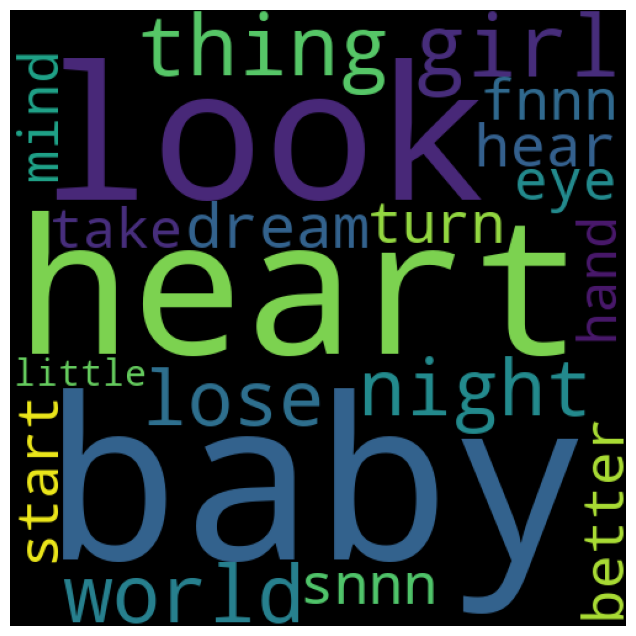

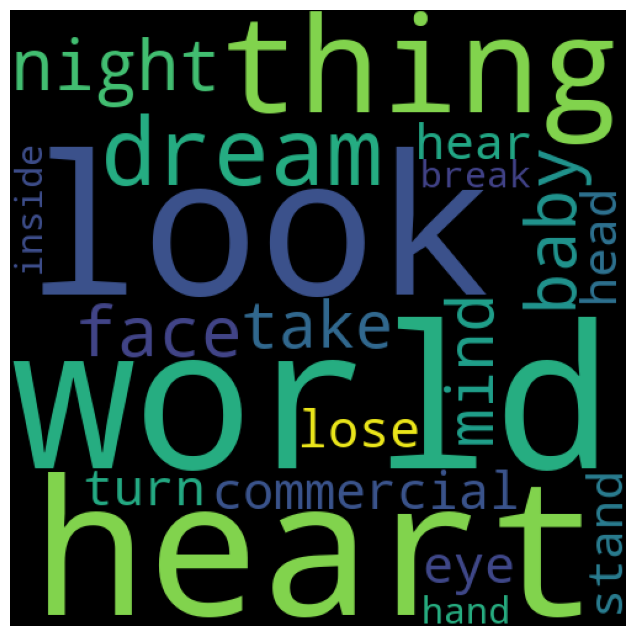

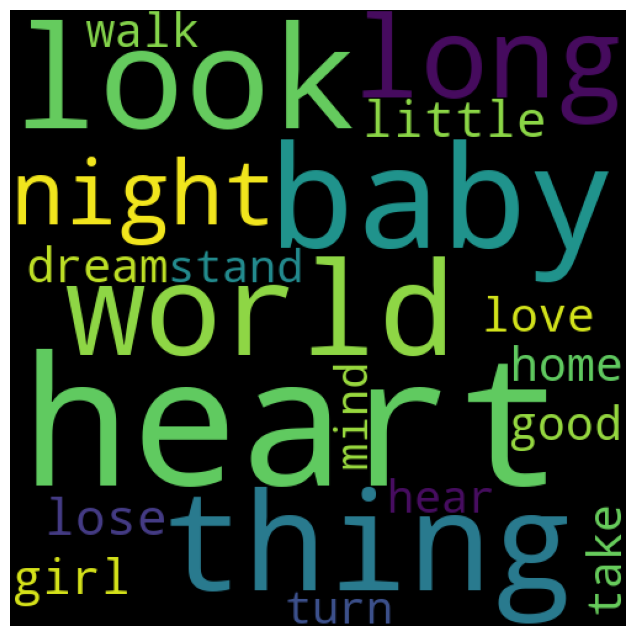

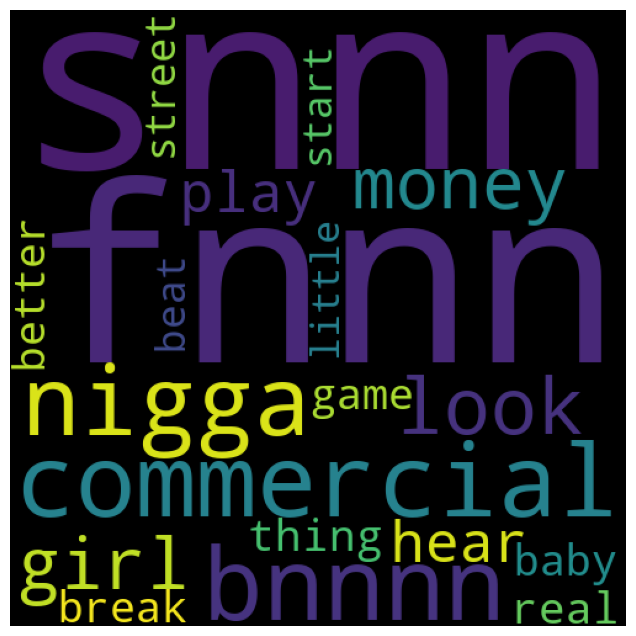

In [146]:
# creating word clouds by time period and genre

def create_wordcloud(df):
    lyrics = ''
    for song in df['lyrics']:
        # Wordcloud doesn't accept special characters
        # If you put 'f***' it shows up as 'f' in the cloud
        for lyric in song:
            if lyric == "fuck":
                lyric = "fnnn"
            elif lyric == "bitch":
                lyric = "bnnnn"
            elif lyric == "shit":
                lyric = "snnn"
            lyrics += lyric + ' '
    #for lyric in df['lyrics']:
    #    lyrics += ' '.join(lyric) + ' '
    wordcloud = WordCloud(width=500, height=500, max_words=20,
                          background_color="black").generate(lyrics)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

for df in all_time_dfs:
    create_wordcloud(df)

for df in all_genre_dfs:
    create_wordcloud(df)